In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [5]:
hdata = pd.read_csv('housdata.csv')

In [6]:
hdata

,CONTROL,AGE1,BEDRMS,PER,REGION,METRO3,LMED,FMR,L30,L50,...,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'734778500142',56,4,2,'4','2',70998,1925,18392,30628,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5'
1,'730204310145',54,6,4,'2','1',62425,1199,18729,31213,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'295273830133',39,4,4,'1','2',91523,1819,27459,45761,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','-5','-5'
3,'301895590141',49,5,3,'2','2',70700,1216,19100,31800,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','-5','-5'
4,'100007130148',30,2,2,'3','1',61059,685,14662,24438,...,'2 50.1 - 100% FMR','3 50 - 60% AMI','3 50 - 60% AMI','3 50 - 60% AMI','3 50 - 60% AMI','2 30 - 50% AMI','0 Not Assisted','3 50% or More','-5','-5'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3946,'187812570142',25,3,4,'3','1',67900,1236,20350,33950,...,'3 GT FMR','5 80 - 100% AMI','5 80 - 100% AMI','7 120% AMI +','5 80 - 100% AMI','6 100 - 120% AMI','.','1 Less than 30%','-5','-5'
3947,'280828360140',67,3,6,'2','1',83900,1143,29150,48650,...,'3 GT FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
3948,'187827900149',78,4,2,'3','1',61239,1047,14818,24711,...,'3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','5 80 - 100% AMI','4 60 - 80% AMI','5 80 - 100% AMI','.','1 Less than 30%','-5','-5'
3949,'187828980149',-9,4,-6,'2','2',83900,1284,17600,29350,...,'.','6 100 - 120% AMI','6 100 - 120% AMI','7 120% AMI +','5 80 - 100% AMI','.','.','.','-5','-5'


In [7]:
# Remove rows with negative values in 'VALUE' column
hdata = hdata[hdata['VALUE'] >= 0]
# Remove rows with null values in 'FMTZADEQ' column
hdata = hdata.dropna(subset=['FMTZADEQ'])

hdata

,CONTROL,AGE1,BEDRMS,PER,REGION,METRO3,LMED,FMR,L30,L50,...,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'734778500142',56,4,2,'4','2',70998,1925,18392,30628,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5'
1,'730204310145',54,6,4,'2','1',62425,1199,18729,31213,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'295273830133',39,4,4,'1','2',91523,1819,27459,45761,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','-5','-5'
3,'301895590141',49,5,3,'2','2',70700,1216,19100,31800,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','-5','-5'
6,'466383110144',40,3,5,'4','2',96800,2213,36650,61050,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,'299883930344',57,3,2,'1','3',71779,1095,17448,29071,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','-5','-5'
3946,'187812570142',25,3,4,'3','1',67900,1236,20350,33950,...,'3 GT FMR','5 80 - 100% AMI','5 80 - 100% AMI','7 120% AMI +','5 80 - 100% AMI','6 100 - 120% AMI','.','1 Less than 30%','-5','-5'
3947,'280828360140',67,3,6,'2','1',83900,1143,29150,48650,...,'3 GT FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
3948,'187827900149',78,4,2,'3','1',61239,1047,14818,24711,...,'3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','5 80 - 100% AMI','4 60 - 80% AMI','5 80 - 100% AMI','.','1 Less than 30%','-5','-5'


# Q1
How does the housing quality vary across different regions? (ZADEQ, REGION)

In [8]:
import re

# Define a function to clean and replace values in 'ZADEQ' column 
# bcecoues there r 2 values that hv the same meaning "2" and '2'.
def clean_zadeq(value):
    if re.match(r"^\s*'2'?\s*$", value):
        return '2'
    else:
        return value

hdata['ZADEQ'] = hdata['ZADEQ'].apply(clean_zadeq)

hdata['ZADEQ'] = hdata['ZADEQ'].replace('-', np.nan)


In [9]:
## Get the unique values in the 'ZADEQ' column to make sure data is clean
unique_values = hdata['ZADEQ'].unique()

print("Unique values in 'ZADEQ' column:", unique_values)


Unique values in 'ZADEQ' column: ["'1'" '2' "'-6'" "'3'"]


In [10]:
# Group the data by 'REGION' and 'ZADEQ' and count the number of occurrences
counts = hdata.groupby(['REGION', 'ZADEQ']).size().reset_index(name='count')

Q1 = counts.pivot(index='REGION', columns='ZADEQ', values='count')

# Fill missing values with 0
Q1 = Q1.fillna(0)

# Rename the columns to proppr naming
Q1 = Q1.rename(columns={"'1'": "Highly Adequate", "2": "Middle Adequate", "'3'": "Low Adequate"})
Q1 = Q1.reindex(columns=["Highly Adequate", "Middle Adequate", "Low Adequate"])

print(Q1)



ZADEQ   Highly Adequate  Middle Adequate  Low Adequate
REGION                                                
'1'                 589                9             4
'2'                 462                6             2
'3'                 606                4             2
'4'                 511                4             4


In [12]:
# Calculate the total count of units in each region
total_counts = Q1.sum(axis=1)

# Calculate the percentage of highly adequate units in each region
percentage_highly_adequate = (Q1["Highly Adequate"] / total_counts) * 100

# Display the resulting percentages
print("Percentage of Highly Adequate Units in Each Region:")
print(percentage_highly_adequate)


Percentage of Highly Adequate Units in Each Region:
REGION
'1'    97.840532
'2'    98.297872
'3'    99.019608
'4'    98.458574
dtype: float64


# Q2
which housing unit has the most number of rooms and has an under-average value? (CONTROL, ROOMS, VALUE)



In [13]:
# Calculate the average value

hdata['VALUE'] = hdata['VALUE'].replace('-', np.nan)
average_value = hdata['VALUE'].mean()

# Filter to under the average and positive value
filtered_data = hdata[(hdata['VALUE'] < average_value) & (hdata['VALUE'] >= 0)]

# Find the unit with the most rooms
housing_unit = filtered_data[filtered_data['ROOMS'] == filtered_data['ROOMS'].max()]

print(housing_unit[['CONTROL', 'ROOMS', 'VALUE']])

print(average_value)


            CONTROL  ROOMS   VALUE
455  '184502790140'     14  200000
504217.58601458604


# Q3
How does the housing quality vary across different year ranges? (FMTZADEQ, FMTBUILT) 


In [14]:
unique_values = hdata['FMTBUILT'].unique()
print(unique_values)


# Remove rows with '-5' in the 'FMTBUILT' column
hdata = hdata[hdata['FMTBUILT'] != "'-5'"]

# Display the filtered data
print(hdata[['CONTROL', 'FMTBUILT']])


["'2000-2009'" "'1990-1999'" "'1960-1979'" "'1980-1989'" "'1940-1959'"
 "'-5'"]
             CONTROL     FMTBUILT
0     '734778500142'  '2000-2009'
1     '730204310145'  '1990-1999'
2     '295273830133'  '1960-1979'
3     '301895590141'  '1980-1989'
6     '466383110144'  '1960-1979'
...              ...          ...
3939  '730783800149'  '1990-1999'
3944  '288127700140'  '1960-1979'
3945  '299883930344'  '1960-1979'
3947  '280828360140'  '1960-1979'
3949  '187828980149'  '1960-1979'

[2060 rows x 2 columns]


In [15]:

# Remove rows with '-5' in the 'FMTZADEQ' column
hdata  = hdata [hdata ['FMTZADEQ'] != "'-5'"]

# Display the filtered data
print(hdata [ 'FMTZADEQ'])


unique_values = hdata['FMTZADEQ'].unique()
print(unique_values)


0                 '1 Adequate'
1                 '1 Adequate'
2                 '1 Adequate'
3                 '1 Adequate'
6                 '1 Adequate'
                 ...          
3938              '1 Adequate'
3939              '1 Adequate'
3944              '1 Adequate'
3945              '1 Adequate'
3947    '2 Moderately Inadequ'
Name: FMTZADEQ, Length: 1950, dtype: object
["'1 Adequate'" "'2 Moderately Inadequ'" "'3 Severely Indadequa'"]


In [16]:
# Clean the column
hdata['FMTZADEQ'] = hdata['FMTZADEQ'].str.replace("'", "")

# Group the data by 'FMTBUILT' and 'FMTZADEQ' 
grouped_counts = hdata.groupby(['FMTBUILT', 'FMTZADEQ']).size().reset_index(name='count')

Q3 = grouped_counts.pivot(index='FMTZADEQ', columns='FMTBUILT', values='count')

# Sort the columns 
Q3 = Q3.reindex(sorted(Q3.columns), axis=1)

print(Q3)


FMTBUILT              '1940-1959'  '1960-1979'  '1980-1989'  '1990-1999'  \
FMTZADEQ                                                                   
1 Adequate                  228.0        473.0        288.0        447.0   
2 Moderately Inadequ          5.0          4.0          2.0          3.0   
3 Severely Indadequa          1.0          4.0          1.0          NaN   

FMTBUILT              '2000-2009'  
FMTZADEQ                           
1 Adequate                  492.0  
2 Moderately Inadequ          1.0  
3 Severely Indadequa          1.0  


# Q4
what is the relationship between the number of people per unit and the monthly utility cost? (UTILITY, PER)


In [17]:
import pandas as pd

# Calculate the correlation coefficient
correlation = hdata['PER'].corr(hdata['UTILITY'])

print("Correlation coefficient between 'PER' and 'UTILITY':", correlation)


Correlation coefficient between 'PER' and 'UTILITY': 0.2657760945756594


Data Visuallisation:

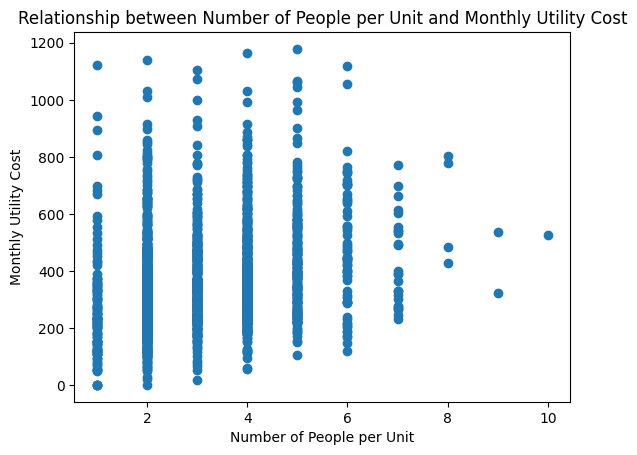

In [18]:
import matplotlib.pyplot as plt

# Create a scatter plot of 'PER' vs 'UTILITY'
plt.scatter(hdata['PER'], hdata['UTILITY'])

# Set plot labels and title
plt.xlabel('Number of People per Unit')
plt.ylabel('Monthly Utility Cost')
plt.title('Relationship between Number of People per Unit and Monthly Utility Cost')

# Show the plot
plt.show()


# Q5
Are there any significant differences in the adequacy of the housing unit and the Location? (METRO3, FMTZADEQ)
METRO3 indicates whether a housing unit is located in a central city, suburb, or outside a metropolitan area. 

In [20]:
# Compute cross-tabulation of METRO3 and FMTZADEQ
cross_tab = pd.crosstab(hdata['METRO3'], hdata['FMTZADEQ'], dropna=False)
print(cross_tab)

FMTZADEQ  1 Adequate  2 Moderately Inadequ  3 Severely Indadequa
METRO3                                                          
'1'              357                     5                     4
'2'             1020                     7                     3
'3'              364                     3                     0
'4'               71                     0                     0
'5'              116                     0                     0


# Q6
How does the quality of housing vary based on the number of occupants in a housing unit? (PER, FMTZADEQ)


In [21]:
# Group the data by 'PER' and 'FMTZADEQ' 
grouped_counts = hdata.groupby(['PER', 'FMTZADEQ']).size().reset_index(name='count')

Q6 = grouped_counts.pivot(index='PER', columns='FMTZADEQ', values='count')
Q6 = Q6.reindex(sorted(Q6.columns), axis=1)

print(Q6)


FMTZADEQ  1 Adequate  2 Moderately Inadequ  3 Severely Indadequa
PER                                                             
1              120.0                   3.0                   1.0
2              687.0                   3.0                   1.0
3              350.0                   3.0                   NaN
4              465.0                   3.0                   5.0
5              211.0                   1.0                   NaN
6               63.0                   2.0                   NaN
7               25.0                   NaN                   NaN
8                4.0                   NaN                   NaN
9                2.0                   NaN                   NaN
10               1.0                   NaN                   NaN


# Q7
Are there any disparities in housing adequacy across income groups?(ZINC2,FMTZADEQ)





In [23]:
# clean 'ZINC2' column
hdata = hdata[hdata['ZINC2'] >= 0]
print(hdata[['ZINC2']])


       ZINC2
0     785402
1     742441
2     725402
3     695402
6     691480
...      ...
3938  176000
3939  176000
3944  175800
3945  175600
3947  175538

[1949 rows x 1 columns]


In [24]:
# Create income classes
income_classes = ['Low Income', 'Medium Income', 'High Income']

# Group 'ZINC2' into income classes and create a new column 'IncomeGroup'
hdata['IncomeGroup'] = pd.cut(hdata['ZINC2'], bins=[0, 30000, 70000, float('inf')], labels=income_classes)

# Group the data by 'IncomeGroup' and 'FMTZADEQ'
Q7 = hdata.groupby(['IncomeGroup', 'FMTZADEQ']).size().unstack()

print(Q7)


FMTZADEQ       1 Adequate  2 Moderately Inadequ  3 Severely Indadequa
IncomeGroup                                                          
Low Income              0                     0                     0
Medium Income           0                     0                     0
High Income          1927                    15                     7


# Data Visualisation 

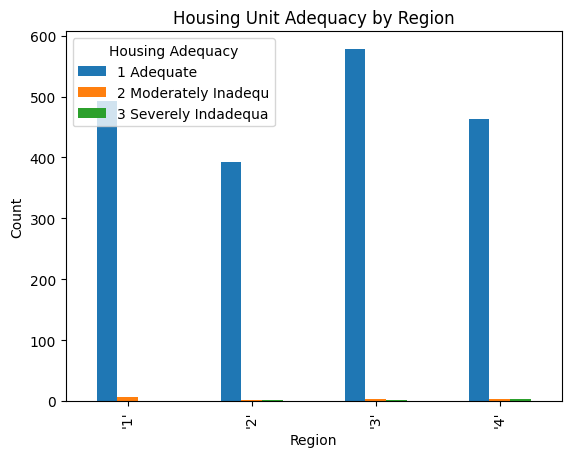

In [30]:
region_adequacy_counts = hdata.groupby(['REGION', 'FMTZADEQ']).size().unstack()
region_adequacy_counts.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Housing Unit Adequacy by Region')
plt.legend(title='Housing Adequacy')
plt.show()


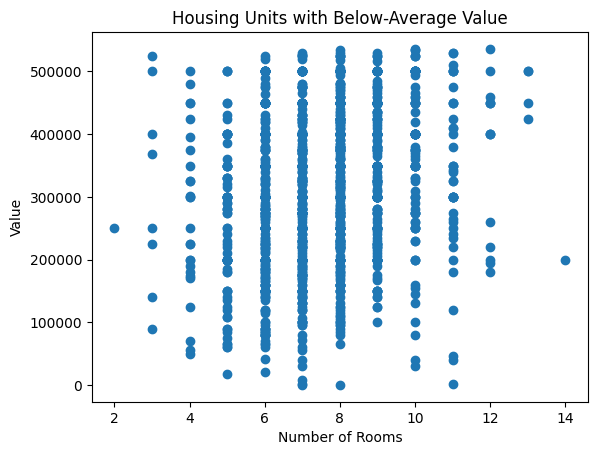

In [33]:

# Filter data for housing units with below-average value
below_avg_value = hdata[hdata['VALUE'] < hdata['VALUE'].mean()]

# Plotting
plt.scatter(below_avg_value['ROOMS'], below_avg_value['VALUE'])
plt.xlabel('Number of Rooms')
plt.ylabel('Value')
plt.title('Housing Units with Below-Average Value')
plt.show()


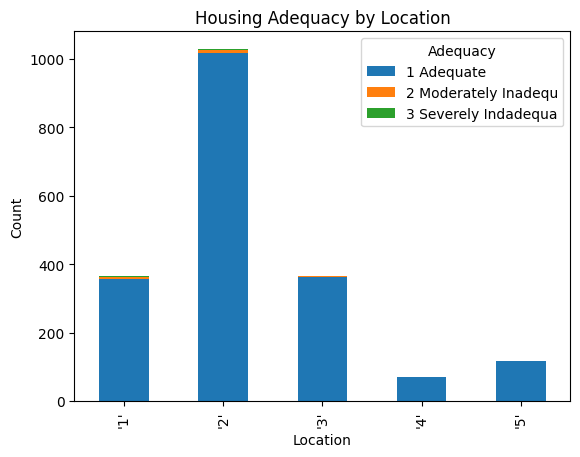

In [38]:
import matplotlib.pyplot as plt

# Group data by location and adequacy, and calculate counts
grouped_counts = hdata.groupby(['METRO3', 'FMTZADEQ']).size().unstack()

# Plotting
grouped_counts.plot(kind='bar', stacked=True)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Housing Adequacy by Location')
plt.legend(title='Adequacy')
plt.show()


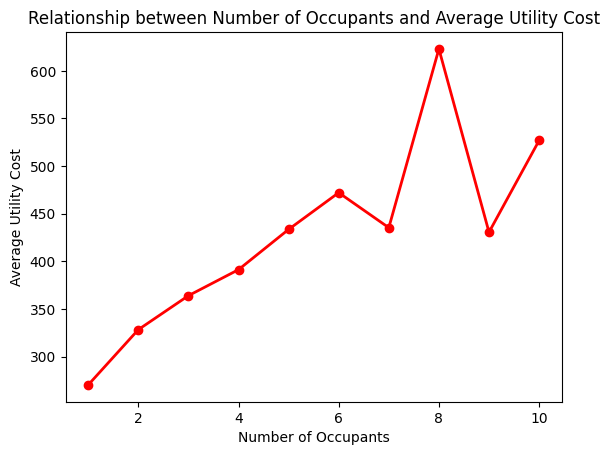

In [51]:
import matplotlib.pyplot as plt

# Group data by 'PER' and calculate average utility cost
utility_costs = hdata.groupby('PER')['UTILITY'].mean()

# Set up the line plot
fig, ax = plt.subplots()

ax.plot(utility_costs, color='red', marker='o', linestyle='-', linewidth=2)

ax.set_xlabel('Number of Occupants')
ax.set_ylabel('Average Utility Cost')
ax.set_title('Relationship between Number of Occupants and Average Utility Cost')

plt.show()


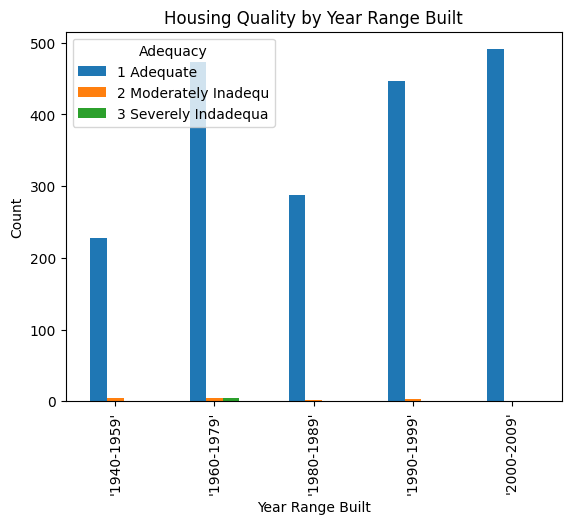

In [45]:

grouped_counts = hdata.groupby(['FMTBUILT', 'FMTZADEQ']).size().unstack()

grouped_counts.plot(kind='bar')
plt.xlabel('Year Range Built')
plt.ylabel('Count')
plt.title('Housing Quality by Year Range Built')
plt.legend(title='Adequacy')
plt.show()


# remove noise columns

In [ ]:
columns_to_keep = ['CONTROL', 'PER', 'REGION', 'METRO3',
                   'VALUE', 'ZINC2', 'ROOMS', 'ZADEQ',
                   'UTILITY', 'FMTZADEQ']

# Drop all other columns
hdata = hdata[columns_to_keep]
hdata

,CONTROL,PER,REGION,METRO3,VALUE,ZINC2,ROOMS,ZADEQ,UTILITY,FMTZADEQ
0,'734778500142',2,'4','2',2465647,785402,9,'1',1009.166667,1 Adequate
1,'730204310145',4,'2','1',740000,742441,10,'1',381.000000,1 Adequate
2,'295273830133',4,'1','2',450000,725402,9,'1',710.166667,1 Adequate
3,'301895590141',3,'2','2',665000,695402,9,'1',471.416667,1 Adequate
4,'100007130148',2,'3','1',-6,15600,5,'1',113.000000,1 Adequate
...,...,...,...,...,...,...,...,...,...,...
9166,'730591550146',3,'3','5',125000,120000,6,'1',309.333333,1 Adequate
9167,'400434500148',4,'3','1',660000,120000,6,'1',313.000000,1 Adequate
9169,'688045370142',2,'4','2',265000,120000,6,'1',374.000000,1 Adequate
9170,'736389050140',1,'3','2',180000,120000,6,'1',315.666667,1 Adequate


# output the dataframe

In [ ]:
# Output the DataFrame to a CSV file
hdata.to_csv('output.csv', index=False)


In [ ]:
from google.colab import files

files.download('output.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>